<a href="https://colab.research.google.com/github/rgnemasters/Python-Bootcamp-Projects/blob/main/Clustering_Wine_Analysis_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment Header
*Ryan Masters*
* Week 9
* Analysis of KMeans Assignment

#Mount Drive, Import Libraries, and Load File

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
filename = '/content/drive/MyDrive/Datasets/cust_seg.csv'
df = pd.read_csv(filename, index_col='Unnamed: 0')
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


#Exploratory Data Analysis

In [4]:
display(df.info())
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


None

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [5]:
for column in df.columns:
  if df[column].dtypes.name == 'object':
    print(column)
    print('\n\n')
    print(df[column].value_counts())
    print('\n\n')
  else:
    print(column)
    print('\n\n')
    print(df[column].describe())
    print('\n\n')

Customer Id



count    850.00000
mean     425.50000
std      245.51816
min        1.00000
25%      213.25000
50%      425.50000
75%      637.75000
max      850.00000
Name: Customer Id, dtype: float64



Age



count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64



Edu



count    850.000000
mean       1.710588
std        0.927784
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Edu, dtype: float64



Years Employed



count    850.000000
mean       8.565882
std        6.777884
min        0.000000
25%        3.000000
50%        7.000000
75%       13.000000
max       33.000000
Name: Years Employed, dtype: float64



Income



count    850.000000
mean      46.675294
std       38.543054
min       13.000000
25%       24.000000
50%       35.000000
75%       55.750000
max      446.000000
Name: Income, dt

In [6]:
#Review values in 'defaulted' to determine imputation strategy
df['Defaulted'].value_counts(dropna=False, normalize=True).round(2)

0.0    0.61
1.0    0.22
NaN    0.18
Name: Defaulted, dtype: float64

Since this category is ordinal and binary, I will use the median-value imputation strategy

#Set up Imputers and Pipelines

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')

pre_pipe = make_pipeline(scaler, mean_imputer)
scaled_df = pre_pipe.fit_transform(df)

#Test and Tune Hyperparameters

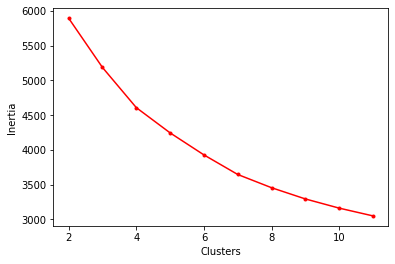

In [8]:
inertias = []
for k in range(2,12):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)

plt.plot(range(2,12), inertias, marker='.', color='red')
plt.xlabel('Clusters')
plt.ylabel('Inertia');

Text(0, 0.5, 'Silhouette Score')

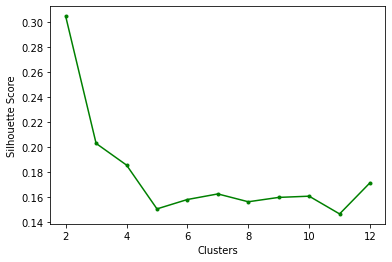

In [9]:
sillies = []
for s in range(2,13):
  kmeans = KMeans(n_clusters=s)
  kmeans.fit(scaled_df)
  sillies.append(silhouette_score(scaled_df, kmeans.labels_))

plt.plot(range(2,13), sillies, marker='.', color='green')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')

Based on the charts above, it appears that 2 clusters performs best, based on the lack of an elbow on the elbow chart, and the high silhouette score at 2 clusters.

#Instantiate and Test Tuned Model

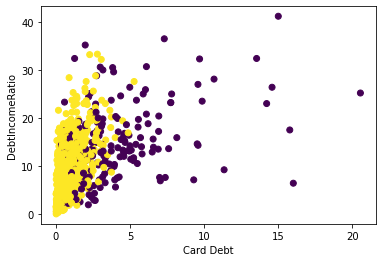

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)
df['cluster'] = kmeans.labels_
plt.scatter(x=df['Card Debt'], y=df['DebtIncomeRatio'], c=df['cluster'])
plt.xlabel('Card Debt')
plt.ylabel('DebtIncomeRatio');

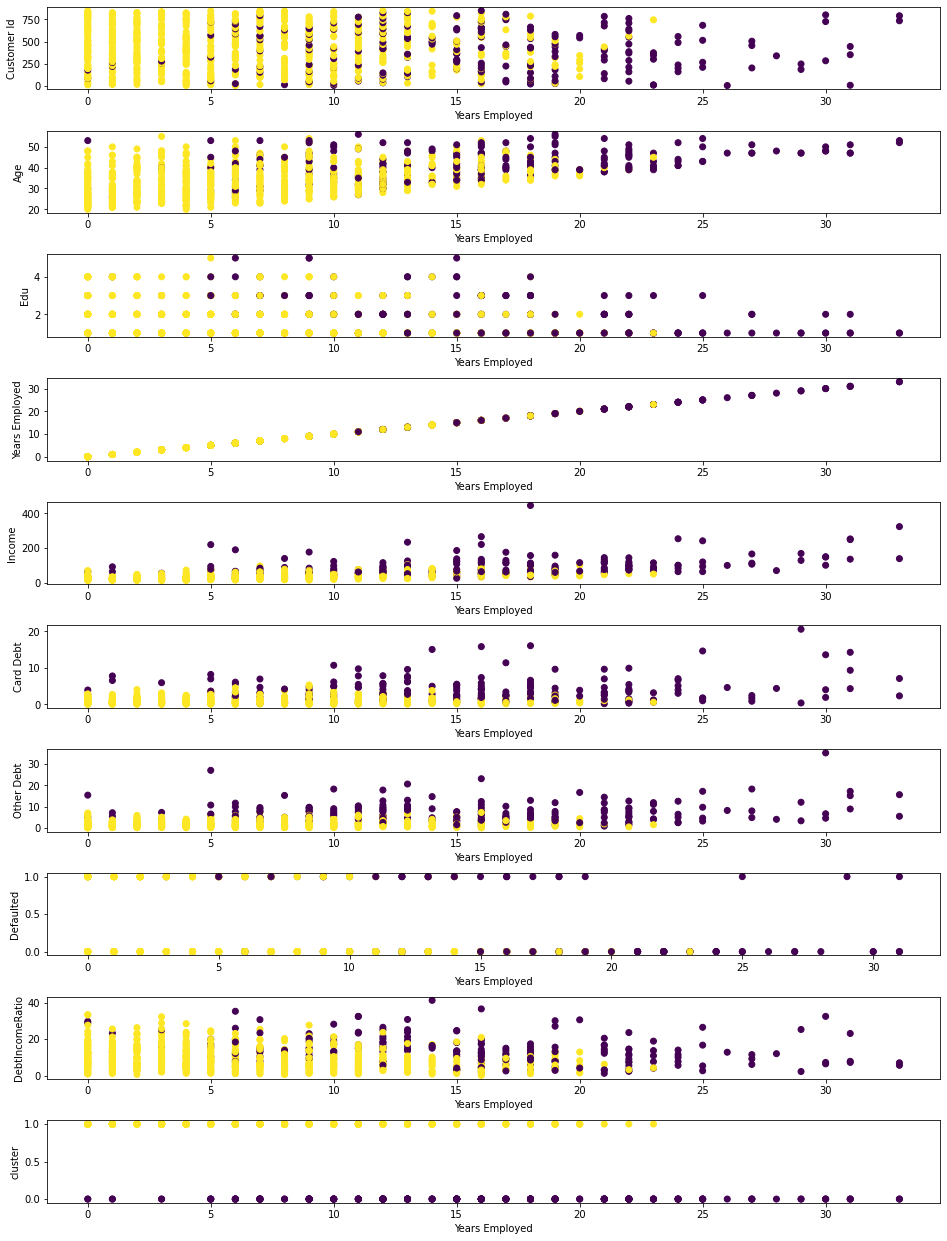

In [11]:
#Produce broad review of clusters based on a x-value of 'Years Employed'
fig, ax = plt.subplots(nrows=len(df.columns), figsize=(16,22));
for index, column in enumerate(df.columns):
  ax[index].scatter(x=df['Years Employed'], y=df[column], c=df['cluster'])
  ax[index].set_xlabel('Years Employed')
  ax[index].set_ylabel(column)        
  plt.subplots_adjust(hspace=.5)                                                   

In [12]:
clusters = df.groupby('cluster', as_index=False).mean()
clusters

,cluster,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,398.920635,42.206349,1.962963,15.835979,92.878307,3.931878,7.308444,0.300654,14.188360
1,1,433.099849,32.977307,1.638427,6.487141,33.464448,0.903437,1.869381,0.250457,9.023147


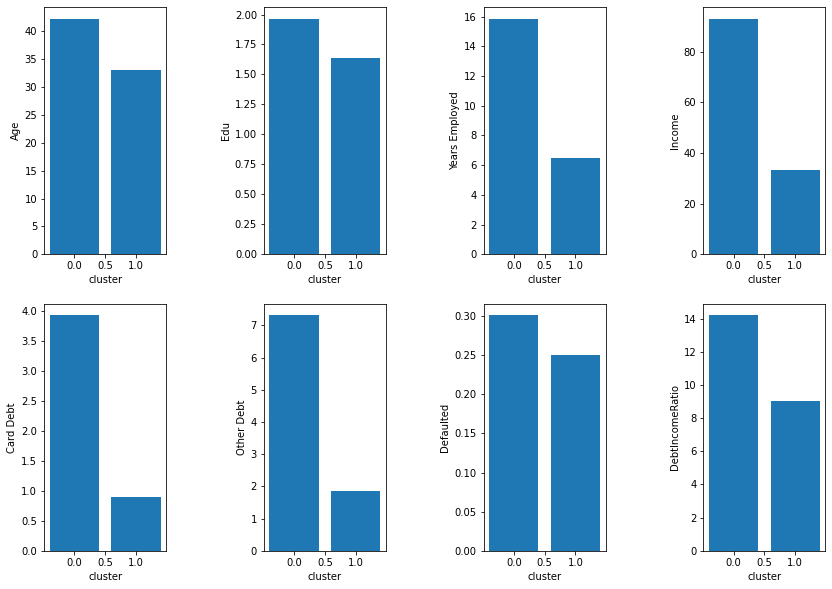

In [20]:
#Plot bar graphs to analyze means of each category by cluster
fig, ax = plt.subplots(2,4, figsize=(14,10))
ax = ax.ravel()
for index, column in enumerate(clusters.columns[2:]):
  ax[index].bar(clusters['cluster'], clusters[column])
  ax[index].set_xlabel('cluster')
  ax[index].set_ylabel(column)

plt.subplots_adjust(wspace=.8)

#Cluster analysis:
* Cluster 0: Cluster 0 is older, has been employed longer, and therefore has a much higher average income than Cluster 1. They have also accrued more debt than Cluster 1, and perhaps as a consequence, have higher rates of default.

* Cluster 1: has less experience and less income, but have far less debt than Cluster 0. This cluster will be at less risk of default, but not as much as the difference in debt-to-income ratio between the clusters would suggest. This issue could be tied to two characteristics of this group: 1) their lack of experience leads to more financial irresponsibility, or 2) because of their low average income they don't have the capacity to pay back their loans.